# PaddlePaddle快速入门
![](https://ai-studio-static-online.cdn.bcebos.com/466b717826ff438a917074f4e62ca844e5f291ca1f8b48d7b78838d513ad7536)

学会使用深度学习框架是解决深度学习任务的基本能力，这里我们推荐成熟易用的国产开源框架PaddlePaddle。以下内容将带你你快速入门PaddlePaddle，你可以尝试跑通一个小demo来熟悉PaddlePaddle的基本命令。

# PaddlePaddle基础命令
PaddlePaddle是百度开源的深度学习框架，类似的深度学习框架还有谷歌的Tensorflow、Facebook的Pytorch等，在入门深度学习时，学会并使用一门常见的框架，可以让学习效率大大提升。在PaddlePaddle中，计算的对象是张量，我们可以先使用PaddlePaddle来计算一个[[1, 1], [1, 1]] * [[1, 1], [1, 1]]。

## 计算常量的加法：1+1
首先导入PaddlePaddle库


In [5]:
import paddle

paddle.__version__

'2.1.2'

定义两个张量的常量x1和x2，并指定它们的形状是[2, 2]，并赋值为1铺满整个张量，类型为int64.

In [6]:
# 定义两个张量
x1 = paddle.ones([2,2], dtype='int64')
x2 = paddle.ones([2,2], dtype='int64')

接着定义一个操作，该计算是将上面两个张量进行加法计算，并返回一个求和的算子。PaddlePaddle提供了大量的操作，比如加减乘除、三角函数等。

In [7]:
# 将两个张量求和
y1 = paddle.add(x1, x2)

# 查看结果
print(y1)

Tensor(shape=[2, 2], dtype=int64, place=CPUPlace, stop_gradient=True,
       [[2, 2],
        [2, 2]])


# 使用PaddlePaddle做线性回归

在上面的教学中，教大家学会用PaddlePaddle做基本的算子运算，下面来教大家如何用PaddlePaddle来做简单的线性回归，包括从定义网络到使用自定义的数据进行训练，最后验证我们网络的预测能力。

首先导入PaddlePaddle库和一些工具类库。

In [8]:
import paddle
import numpy as np

paddle.__version__

'2.1.2'

我们使用numpy定义一组数据，这组数据的每一条数据有13个，为了做示例，其中除了第一个数外都填充了0。这组数据是符合y = 2 * x + 1，但是程序是不知道的，我们之后使用这组数据进行训练，看看强大的神经网络是否能够训练出一个拟合这个函数的模型。最后定义了一个预测数据，是在训练完成，使用这个数据作为x输入，看是否能够预测于正确值相近结果。

In [9]:
# 定义训练和测试数据
x_data = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
                   [2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
                   [3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
                   [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
                   [5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]).astype('float32')
y_data = np.array([[3.0], [5.0], [7.0], [9.0], [11.0]]).astype('float32')
test_data = np.array([[6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]).astype('float32')

定义一个简单的线性网络，这个网络非常简单，结构是：
```text
[输入层] --> [隐层] --> [激活函数] --> [输出层]
```

更具体的就是一个输出大小为100的全连接层、之后接激活函数ReLU和一个输出大小为1的全连接层，就这样构建了一个非常简单的网络。

这里定义输入层的形状为13，这是因为波士顿房价数据集的每条数据有13个属性，我们之后自定义的数据集也是为了符合这一个维度。

In [10]:
# 定义一个简单的线性网络
net = paddle.nn.Sequential(
    paddle.nn.Linear(13, 100),
    paddle.nn.ReLU(),
    paddle.nn.Linear(100, 1)
)

接着是定义训练使用的优化方法，这里使用的是随机梯度下降优化方法。PaddlePaddle提供了大量的优化函数接口，除了本项目使用的随机梯度下降法（SGD），还有Momentum、Adagrad、Adagrad等等，读者可以更加自己项目的需求使用不同的优化方法。

In [11]:
# 定义优化方法
optimizer = paddle.optimizer.SGD(learning_rate=0.01, parameters=net.parameters())

我们可以使用数据进行训练了，我们这次训练了10个pass，读者可根据情况设置更多的训练轮数，通常来说训练的次数和模型收敛有一定的关系。

因为本项目是一个线性回归任务，所以我们在训练的时候使用的是平方差损失函数。因为`paddle.nn.functional.square_error_cost`求的是一个Batch的损失值，所以我们还要对他求一个平均值。PaddlePaddle提供了很多的损失函数的接口，比如交叉熵损失函数`paddle.nn.CrossEntropyLoss`。

在训练过程中，我们可以看到输出的损失值在不断减小，证明我们的模型在不断收敛。

In [12]:
# 将numpy类型数据转换成tensor之后才能用于模型训练
inputs = paddle.to_tensor(x_data)
labels = paddle.to_tensor(y_data)

# 开始训练100个pass
for pass_id in range(10):
    out = net(inputs)
    loss = paddle.mean(paddle.nn.functional.square_error_cost(out, labels))

    loss.backward()
    optimizer.step()
    optimizer.clear_grad()

    print("Pass:%d, Cost:%0.5f" % (pass_id, loss))

Pass:0, Cost:59.79158
Pass:1, Cost:19.42874
Pass:2, Cost:3.69929
Pass:3, Cost:0.12066
Pass:4, Cost:0.02968
Pass:5, Cost:0.02904
Pass:6, Cost:0.02843
Pass:7, Cost:0.02784
Pass:8, Cost:0.02726
Pass:9, Cost:0.02669


训练完成之后，我们使用上面克隆主程序得到的预测程序了预测我们刚才定义的预测数据。根据我们上面定义数据时，满足规律y = 2 * x + 1，所以当x为6时，y应该时13，最后输出的结果也是应该接近13的。

In [13]:
# 开始预测
predict_inputs = paddle.to_tensor(test_data)
result = net(predict_inputs)

print("当x为6.0时，y为：%0.5f" % result)

当x为6.0时，y为：13.24943


# 快来上手第一个Demo吧！——用PaddlePaddle做房价预测

# **Step1：准备数据。**

- 1. uci-housing数据集介绍

数据集共506行,每行14列。前13列用来描述房屋的各种信息，最后一列为该类房屋价格中位数。

PaddlePaddle提供了读取uci_housing数据集的接口，`paddle.text.datasets.UCIHousing`。

- 2. 数据集加载

PaddlePaddle中使用`paddle.io.DataLoader`来进行数据的加载操作，通过参数batch_size控制批次大小，shuffle控制是否打乱顺序。

In [32]:
# 导入基本的库
import os
import paddle
import numpy as np


BATCH_SIZE=20

train_dataset = paddle.text.datasets.UCIHousing(mode='train')
valid_dataset = paddle.text.datasets.UCIHousing(mode='test')

#用于训练的数据加载器，每次随机读取批次大小的数据，剩余不满足批大小的数据丢弃
train_loader = paddle.io.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

#用于测试的数据加载器，每次随机读取批次大小的数据
valid_loader = paddle.io.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)

打印查看uci_housing数据

In [33]:
#用于打印，查看uci_housing数据
print(train_dataset[0])

(array([-0.0405441 ,  0.06636363, -0.32356226, -0.06916996, -0.03435197,
        0.05563625, -0.03475696,  0.02682186, -0.37171334, -0.21419305,
       -0.33569506,  0.10143217, -0.21172912], dtype=float32), array([24.], dtype=float32))


# **Step2:网络配置**

**（1）网络搭建**：对于线性回归来讲，它就是一个从输入到输出的简单的全连接层。

对于波士顿房价数据集，假设属性和房价之间的关系可以被属性间的线性组合描述。

![](https://ai-studio-static-online.cdn.bcebos.com/f3f567e7aa7a499fb3abb767aaaa1b943eed373cf4694d87beb382e161ea8edc)

![](https://ai-studio-static-online.cdn.bcebos.com/f6c44a96e1624828829bbd438c29c17ead9ecc45c68b4310bfbbb0a4dc96c3fe)



In [34]:
# 输入数据形状为[13]，输出形状[1]
net = paddle.nn.Linear(13, 1)

**(2)定义损失函数**

此处使用均方差损失函数。

square_error_cost(input,lable):接受输入预测值和目标值，并返回方差估计,即为（y-y_predict）的平方

**(3)定义优化函数**

此处使用的是随机梯度下降。

In [35]:
optimizer = paddle.optimizer.SGD(learning_rate=0.001, parameters=net.parameters())

# **Step3.模型训练** and **Step4.模型评估**

**（1）定义绘制训练过程的损失值变化趋势的方法draw_train_process**

In [36]:
import matplotlib.pyplot as plt


iter = 0
iters = []
train_costs = []

def draw_train_process(iters, train_costs):
    title="training cost"
    plt.title(title, fontsize=24)
    plt.xlabel("iter", fontsize=14)
    plt.ylabel("cost", fontsize=14)
    plt.plot(iters, train_costs, color='red', label='training cost') 
    plt.grid()
    plt.show()

**（2）训练并保存模型**

遍历轮次和数据集loader，将批次数据送入net里面进行计算，最终经过loss计算，在进行反向传播和参数优化。

注：enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，

Pass:0, Cost:518.33130
Test:0, Cost:70.12001
Pass:1, Cost:664.44934
Test:1, Cost:232.93411
Pass:2, Cost:677.64429
Test:2, Cost:164.07687
Pass:3, Cost:328.76154
Test:3, Cost:244.68904
Pass:4, Cost:506.97089
Test:4, Cost:109.99494
Pass:5, Cost:601.20441
Test:5, Cost:191.15268
Pass:6, Cost:255.98445
Test:6, Cost:138.24420
Pass:7, Cost:327.20792
Test:7, Cost:160.71399
Pass:8, Cost:397.79727
Test:8, Cost:55.34387
Pass:9, Cost:318.53024
Test:9, Cost:101.11332
Pass:10, Cost:375.81226
Test:10, Cost:59.23970
Pass:11, Cost:151.54128
Test:11, Cost:100.27298
Pass:12, Cost:302.66760
Test:12, Cost:161.80023
Pass:13, Cost:338.98981
Test:13, Cost:146.37219
Pass:14, Cost:358.78113
Test:14, Cost:95.79240
Pass:15, Cost:250.38554
Test:15, Cost:37.45445
Pass:16, Cost:159.32510
Test:16, Cost:218.91922
Pass:17, Cost:180.01738
Test:17, Cost:50.84778
Pass:18, Cost:214.17838
Test:18, Cost:9.02155
Pass:19, Cost:164.47644
Test:19, Cost:77.38618
Pass:20, Cost:64.16972
Test:20, Cost:41.33039
Pass:21, Cost:127.71362

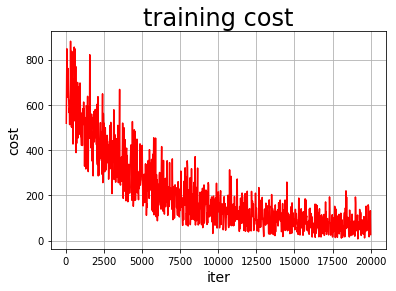

In [37]:
EPOCH_NUM=50

#训练EPOCH_NUM轮
for pass_id in range(EPOCH_NUM):                                  
    # 开始训练并输出最后一个batch的损失值
    train_cost = 0

    #遍历train_reader迭代器
    for batch_id, data in enumerate(train_loader()):
        inputs = paddle.to_tensor(data[0])
        labels = paddle.to_tensor(data[1])
        out = net(inputs)
        train_loss = paddle.mean(paddle.nn.functional.square_error_cost(out, labels))
        train_loss.backward()
        optimizer.step()
        optimizer.clear_grad()

        #每运行40步，输出一次信息,
        #注意batch_id=0时也输出, 即 0, 40, 80, ...
        if batch_id % 40 == 0:
            print("Pass:%d, Cost:%0.5f" % (pass_id, train_loss))    
        
        iter = iter + BATCH_SIZE
        iters.append(iter)
        train_costs.append(train_loss.numpy()[0])
       
    # 开始测试并输出最后一个batch的损失值
    test_loss = 0

    #遍历test_reader迭代器
    for batch_id, data in enumerate(valid_loader()):               
        inputs = paddle.to_tensor(data[0])
        labels = paddle.to_tensor(data[1])
        out = net(inputs)
        test_loss = paddle.mean(paddle.nn.functional.square_error_cost(out, labels))
        
    #打印最后一个batch的损失值
    print('Test:%d, Cost:%0.5f' % (pass_id, test_loss))     
    
#保存模型
paddle.save(net.state_dict(), 'fit_a_line.pdparams')

draw_train_process(iters,train_costs)

# **Step5.模型预测**

**(1)可视化真实值与预测值方法定义**

In [20]:
infer_results = []
groud_truths = []

#绘制真实值和预测值对比图
def draw_infer_result(groud_truths, infer_results):
    title='Boston'
    plt.title(title, fontsize=24)
    x = np.arange(1,20) 
    y = x
    plt.plot(x, y)
    plt.xlabel('ground truth', fontsize=14)
    plt.ylabel('infer result', fontsize=14)
    plt.scatter(groud_truths, infer_results, color='green',label='training cost') 
    plt.grid()
    plt.show()

**(2)开始预测**

通过paddle.load加载已经训练好的模型，来对从未遇见过的数据进行预测。

Index:0, Infer Result: 14.40, Ground Truth: 8.50
Index:1, Infer Result: 14.73, Ground Truth: 5.00
Index:2, Infer Result: 14.09, Ground Truth: 11.90
Index:3, Infer Result: 15.28, Ground Truth: 27.90
Index:4, Infer Result: 14.56, Ground Truth: 17.20
Index:5, Infer Result: 14.95, Ground Truth: 27.50
Index:6, Infer Result: 14.33, Ground Truth: 15.00
Index:7, Infer Result: 14.23, Ground Truth: 17.20
Index:8, Infer Result: 12.51, Ground Truth: 17.90
Index:9, Infer Result: 14.29, Ground Truth: 16.30
Index:10, Infer Result: 12.27, Ground Truth: 7.00
Index:11, Infer Result: 13.43, Ground Truth: 7.20
Index:12, Infer Result: 13.88, Ground Truth: 7.50
Index:13, Infer Result: 13.58, Ground Truth: 10.40
Index:14, Infer Result: 13.63, Ground Truth: 8.80
Index:15, Infer Result: 14.26, Ground Truth: 8.40
Index:16, Infer Result: 15.28, Ground Truth: 16.70
Index:17, Infer Result: 15.12, Ground Truth: 14.20
Index:18, Infer Result: 15.30, Ground Truth: 20.80
Index:19, Infer Result: 13.89, Ground Truth: 13.

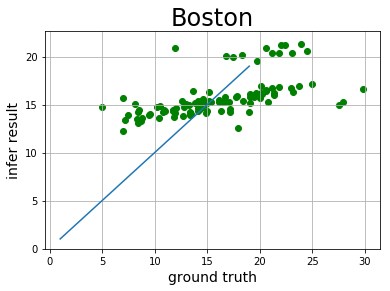

In [21]:
import paddle
import numpy as np
import matplotlib.pyplot as plt


valid_dataset = paddle.text.UCIHousing(mode='test')
infer_loader = paddle.io.DataLoader(valid_dataset, batch_size=200)

infer_net = paddle.nn.Linear(13, 1)
param = paddle.load('fit_a_line.pdparams')
infer_net.set_dict(param)


data = next(infer_loader())
inputs = paddle.to_tensor(data[0])
results = infer_net(inputs)

for idx, item in enumerate(zip(results, data[1])):
    print("Index:%d, Infer Result: %.2f, Ground Truth: %.2f" % (idx, item[0], item[1]))
    infer_results.append(item[0].numpy()[0])
    groud_truths.append(item[1].numpy()[0])
    
draw_infer_result(groud_truths, infer_results)

到这里你已经学会了PaddlePaddle的基本命令和第一个小例子！恭喜你已经入门啦~ 如果想学习更多入门内容欢迎查看AI Studio 上的更多内容，有精选项目，也有优质课程，加油哦！

NLP12日打卡营即将开始，你准备好了吗！